<a href="https://colab.research.google.com/github/Ultan-Kearns/LYIT-Machine-Learning-Project/blob/main/CA3Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib 
import matplotlib.pyplot as plt
from scipy import stats

from google.colab import files
import io

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['BreastCancerDataset.csv']), header = 0)

Saving BreastCancerDataset.csv to BreastCancerDataset.csv


In [3]:
# Show dataset
# split data into training and test datasets
trainingSet = df[0:285]
testSet = df[284:570]
testSet.head()
trainingSet.head()

# Drop ID from the dataframe, it is not useful for our purposes except for identifying unique files
trainingSet = trainingSet.drop(['ID'],axis=1)
testSet = testSet.drop(['ID'],axis=1)


In [4]:
# Show Pearson Correlation
trainingSet.corr(method='pearson')
# Replace malignant with 1 and benign with 0
trainingSet['Diagnosis'] = trainingSet['Diagnosis'].replace({'M':1,'B':0})
testSet['Diagnosis'] = testSet['Diagnosis'].replace({'M':1,'B':0})

In [ ]:
trainingSet.corr(method='spearman')

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.751670,0.530417,0.770053,0.754270,0.298758,0.617646,0.727527,0.785922,0.301701,-0.026659,0.594782,-0.019536,0.616707,0.716094,-0.117259,0.377497,0.449202,0.437686,-0.150871,0.194379,0.819834,0.541166,0.827893,0.819319,0.412350,0.639784,0.711488,0.800981,0.445021,0.359625
Mean_Radius,0.751670,1.000000,0.446436,0.997479,0.999516,0.062931,0.502607,0.654523,0.779339,0.132771,-0.346094,0.635482,-0.082267,0.656045,0.799813,-0.313280,0.300421,0.381421,0.408189,-0.221613,0.039580,0.973279,0.400373,0.968261,0.973044,0.082487,0.492539,0.577597,0.722237,0.201876,0.069355
Mean_Texture,0.530417,0.446436,1.000000,0.455362,0.450151,0.019866,0.338435,0.400192,0.382342,0.082508,-0.071714,0.365716,0.368787,0.379666,0.428030,-0.120911,0.266281,0.288851,0.194831,-0.126580,0.123461,0.474760,0.904425,0.480749,0.476674,0.155306,0.382141,0.413484,0.396182,0.185297,0.190342
Mean_Perimeter,0.770053,0.997479,0.455362,1.000000,0.996858,0.101287,0.550824,0.693203,0.810526,0.164600,-0.297775,0.648409,-0.073115,0.674730,0.809832,-0.294200,0.345165,0.418645,0.438390,-0.202128,0.084796,0.976265,0.409438,0.975828,0.975630,0.115824,0.535472,0.614110,0.752948,0.227703,0.114736
Mean_Area,0.754270,0.999516,0.450151,0.996858,1.000000,0.055735,0.495806,0.652070,0.776028,0.126189,-0.353174,0.639920,-0.078779,0.660322,0.804449,-0.312453,0.295914,0.379410,0.405625,-0.225109,0.035407,0.974529,0.404058,0.969399,0.975159,0.080494,0.487720,0.576184,0.719207,0.197321,0.064427
Mean_Smoothness,0.298758,0.062931,0.019866,0.101287,0.055735,1.000000,0.643904,0.495813,0.510431,0.556791,0.634474,0.290025,0.103567,0.295060,0.251718,0.374895,0.417581,0.338046,0.377698,0.204453,0.482415,0.133266,0.062555,0.157358,0.124867,0.739196,0.474063,0.399105,0.444521,0.401288,0.530404
Mean_Compactness,0.617646,0.502607,0.338435,0.550824,0.495806,0.643904,1.000000,0.907251,0.847017,0.569535,0.515409,0.541526,0.071268,0.600328,0.569745,0.125463,0.835391,0.769991,0.667735,0.132753,0.664712,0.562315,0.334362,0.603476,0.553017,0.551796,0.907126,0.839624,0.815688,0.508107,0.712566
Mean_Concavity,0.727527,0.654523,0.400192,0.693203,0.652070,0.495813,0.907251,1.000000,0.927670,0.471533,0.289335,0.629576,0.075088,0.679213,0.688414,0.072658,0.764147,0.832900,0.711671,0.063758,0.544583,0.703363,0.392498,0.736267,0.698549,0.477021,0.849130,0.924628,0.892567,0.458589,0.570477
Mean_Concave_Points,0.785922,0.779339,0.382342,0.810526,0.776028,0.510431,0.847017,0.927670,1.000000,0.458244,0.152875,0.699663,0.004566,0.734631,0.785149,0.008774,0.616819,0.654365,0.701221,0.002455,0.412396,0.817545,0.359786,0.839900,0.811043,0.446285,0.760698,0.811837,0.924380,0.418626,0.445274
Mean_Symmetry,0.301701,0.132771,0.082508,0.164600,0.126189,0.556791,0.569535,0.471533,0.458244,1.000000,0.447103,0.344076,0.136208,0.353530,0.304664,0.160052,0.439812,0.374620,0.362109,0.413400,0.421407,0.190488,0.123635,0.217150,0.180925,0.410819,0.464905,0.419185,0.429056,0.720318,0.434677


In [5]:
testSet.corr(method='spearman')

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.677616,0.403854,0.682592,0.677814,0.389421,0.559389,0.674905,0.700300,0.309265,-0.034346,0.589712,0.067937,0.612693,0.657047,0.014784,0.363020,0.466313,0.513333,-0.033642,0.195012,0.693659,0.405211,0.701349,0.694359,0.376801,0.519814,0.639754,0.690446,0.260888,0.214825
Mean_Radius,0.677616,1.000000,0.218881,0.997903,0.999505,0.176763,0.446019,0.580588,0.694297,0.053583,-0.378002,0.429112,-0.216944,0.440919,0.648080,-0.348535,0.195363,0.314807,0.376205,-0.268401,-0.077403,0.985550,0.193863,0.975073,0.985348,0.110465,0.434582,0.552956,0.675622,0.083762,-0.026017
Mean_Texture,0.403854,0.218881,1.000000,0.222776,0.221014,0.022855,0.187861,0.265107,0.201610,0.126909,-0.035030,0.353819,0.522750,0.389758,0.351200,0.195230,0.260043,0.265089,0.254523,0.151057,0.171050,0.233102,0.912418,0.244265,0.236971,0.056394,0.185716,0.246415,0.211723,0.049466,0.040189
Mean_Perimeter,0.682592,0.997903,0.222776,1.000000,0.996914,0.204589,0.491073,0.616171,0.723406,0.076171,-0.337871,0.435992,-0.210315,0.457715,0.652771,-0.336331,0.240324,0.354364,0.411440,-0.258090,-0.039105,0.984778,0.196348,0.980693,0.984058,0.132686,0.476944,0.587544,0.705460,0.099764,0.014097
Mean_Area,0.677814,0.999505,0.221014,0.996914,1.000000,0.161829,0.434823,0.575694,0.687231,0.046471,-0.388711,0.431603,-0.215735,0.442928,0.650889,-0.351328,0.191444,0.312123,0.370929,-0.267823,-0.081753,0.985421,0.195381,0.974322,0.985982,0.098560,0.427493,0.549017,0.669207,0.079207,-0.034223
Mean_Smoothness,0.389421,0.176763,0.022855,0.204589,0.161829,1.000000,0.695463,0.509350,0.592336,0.502491,0.549914,0.315969,0.083850,0.314348,0.269161,0.292417,0.349958,0.354535,0.465302,0.085753,0.334768,0.208012,0.057361,0.231743,0.193031,0.830996,0.464657,0.430139,0.533734,0.353984,0.474024
Mean_Compactness,0.559389,0.446019,0.187861,0.491073,0.434823,0.695463,1.000000,0.881910,0.847349,0.502950,0.499799,0.422142,0.024600,0.528530,0.453390,0.129720,0.795229,0.771970,0.782868,0.062903,0.576225,0.460790,0.158492,0.524800,0.449088,0.580274,0.886927,0.826437,0.833618,0.359037,0.654537
Mean_Concavity,0.674905,0.580588,0.265107,0.616171,0.575694,0.509350,0.881910,1.000000,0.911135,0.376821,0.253392,0.453370,0.031156,0.559507,0.526038,0.069678,0.765849,0.889734,0.826397,-0.018751,0.494588,0.588043,0.246615,0.643687,0.583091,0.458451,0.840039,0.944672,0.900300,0.251776,0.509353
Mean_Concave_Points,0.700300,0.694297,0.201610,0.723406,0.687231,0.592336,0.847349,0.911135,1.000000,0.342199,0.156312,0.507418,0.005979,0.575348,0.601775,0.031956,0.599324,0.688026,0.802266,-0.060955,0.349668,0.699705,0.199647,0.737515,0.692445,0.492180,0.736330,0.812470,0.938200,0.232599,0.383921
Mean_Symmetry,0.309265,0.053583,0.126909,0.076171,0.046471,0.502491,0.502950,0.376821,0.342199,1.000000,0.414763,0.277974,0.132087,0.305342,0.213616,0.248261,0.403365,0.337567,0.360129,0.351810,0.368861,0.070447,0.099611,0.093975,0.061011,0.409255,0.380203,0.329570,0.324895,0.688935,0.369218


r^2 value:  0.0940616675343431
mean squared errors value:  169.10143491823223


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


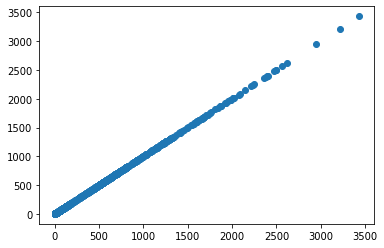

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt


regression_model = LinearRegression().fit(trainingSet, testSet)
rSquared = regression_model.score(trainingSet, testSet)
print('r^2 value: ', rSquared)
print('mean squared errors value: ', sqrt(mean_squared_error(trainingSet,testSet)))
plt.scatter(trainingSet,trainingSet)


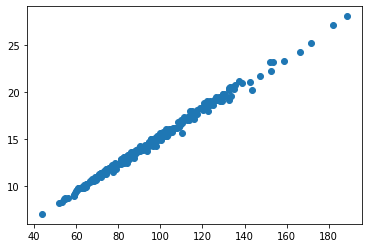

In [ ]:
# Example of positive Linear correlation between radius and perimeter
# since these correlate highly we can remove one of them from set

plt.scatter(trainingSet['Mean_Perimeter'],trainingSet['Mean_Radius'])

# We drop these as seen above all of these correlate well with the mean_radius in both sets

trainingSet = trainingSet.drop(['Mean_Perimeter'],axis=1)
trainingSet = trainingSet.drop(['Mean_Area'],axis=1)
trainingSet = trainingSet.drop(['Worst_Perimeter'],axis=1)
trainingSet = trainingSet.drop(['Worst_Area'],axis=1)
trainingSet = trainingSet.drop(['Mean_Concave_Points'],axis=1)
trainingSet = trainingSet.drop(['Worst_Texture'],axis=1)
trainingSet = trainingSet.drop(['Worst_Fractal_Dimension'],axis=1)

testSet = testSet.drop(['Mean_Perimeter'],axis=1)
testSet = testSet.drop(['Mean_Area'],axis=1)
testSet = testSet.drop(['Worst_Perimeter'],axis=1)
testSet = testSet.drop(['Worst_Area'],axis=1)
testSet = testSet.drop(['Mean_Concave_Points'],axis=1)
testSet = testSet.drop(['Worst_Texture'],axis=1)
testSet = testSet.drop(['Worst_Fractal_Dimension'],axis=1)




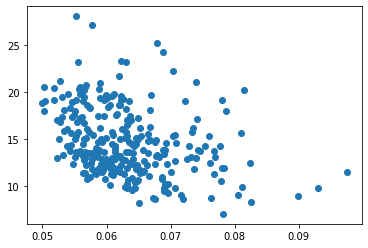

In [ ]:
# example of low negative correlation
plt.scatter(trainingSet['Mean_Fractal_Dimension'],trainingSet['Mean_Radius'])
